# Decision Tree Exercises

In [140]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

from acquire import get_titanic_data
from practice_titanic_prep import prep_titanic_data

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [94]:
# acquire titanic data
df = get_titanic_data()

In [95]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [96]:
df.shape

(891, 13)

In [97]:
# prep titanic data
train, validate, test = prep_titanic_data(df)

In [98]:
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [99]:
train.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,29.0,0,0,7.8958,Cherbourg,1,1,0,0


In [100]:
# drop duplicates of dummy variables and passenger_id since we don't need them for this model
train.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


In [101]:
# do the same for validate and test
validate.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)
test.drop(columns = ['passenger_id', 'sex', 'embark_town'], inplace=True)

## 1.

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [102]:
# check to see most commonly occuring result for target
train.survived.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [103]:
# create new column for baseline, this will be didn't survive since that occured 62% of the time in train dataset
train['baseline'] = 0

In [104]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
455,1,3,29.0,0,0,7.8958,1,1,0,0,0


In [105]:
# Check baseline accuracy
(train.survived == train.baseline).mean()

0.6161048689138576

In [106]:
# drop baseline column as no longer needed
train.drop(columns='baseline', inplace = True)

In [107]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0


## 2.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [108]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [109]:
X_train.head(1)

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,29.0,0,0,7.8958,1,1,0,0


In [110]:
y_train.head(1)

455    1
Name: survived, dtype: int64

In [111]:
# create Decision Tree object
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [126]:
# fit the model
# model.fit(X, y)
clf = clf.fit(X_train, y_train)

In [129]:
# visualize Decision Tree using Graphviz
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

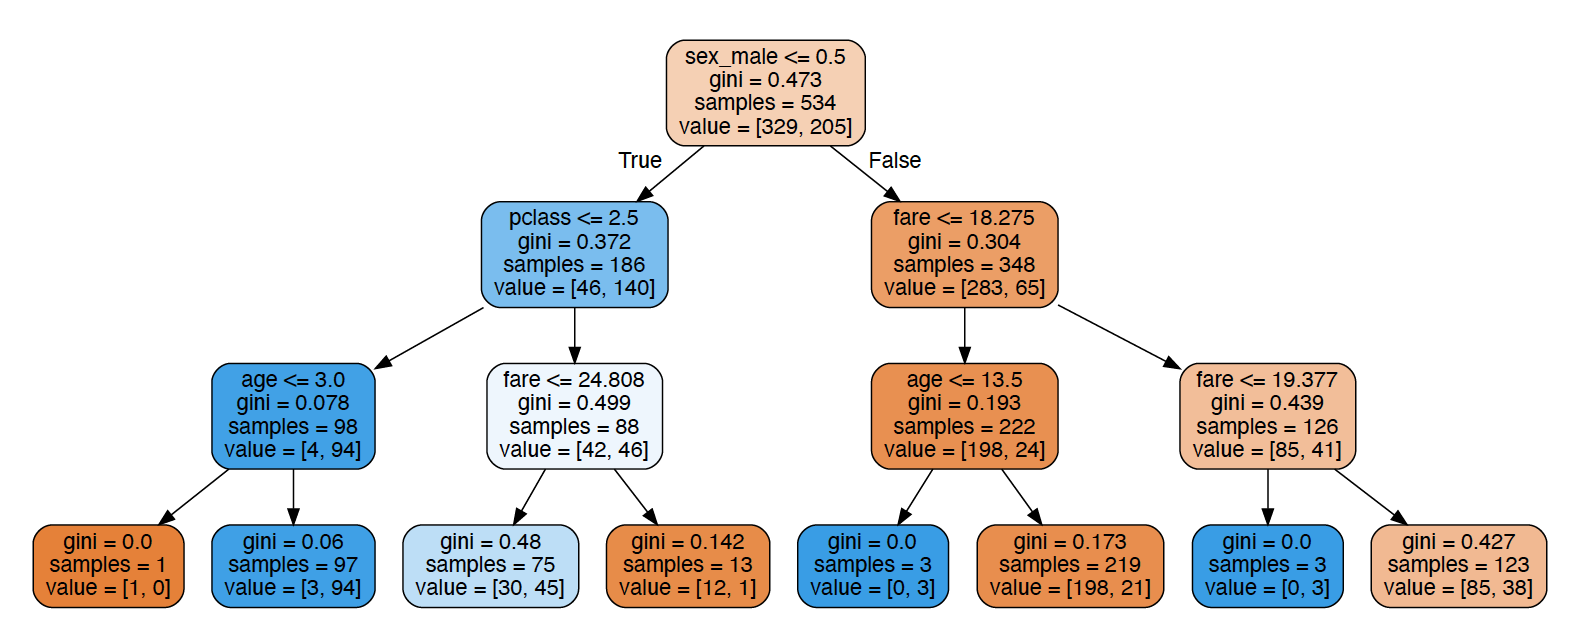

In [132]:
# make prediction on train observations

y_pred = clf.predict(X_train)
y_pred[0:5]

[0, 1, 0, 0, 0]

In [131]:
# Estimate probability

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.90410959, 0.09589041],
       [0.03092784, 0.96907216],
       [0.69105691, 0.30894309],
       [0.69105691, 0.30894309],
       [0.90410959, 0.09589041]])

In [134]:
train.survived.head() # doesn't look too accurate so far

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

## 3.

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [142]:
# what is model score?

In [135]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[296,  33],
       [ 60, 145]])

In [139]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,296,33
1,60,145


In [136]:
# classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       329
           1       0.81      0.71      0.76       205

    accuracy                           0.83       534
   macro avg       0.82      0.80      0.81       534
weighted avg       0.82      0.83      0.82       534



In [141]:
accuracy_score(y_train, y_pred)

0.8258426966292135

***Performs better than baseline***

## 4.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

## 5.

Run through steps 2-4 using a different max_depth value.

## 6.

Which model performs better on your in-sample data?

## 7.

Which model performs best on your out-of-sample data, the validate set?